# **Technical Stock Analysis and Stock Prediction Using Machine Learning**



> Technical analysis is a key compontent of the stock market. Traders use techincal analysis to pick good stocks to trade and even predict stock prices. Machine learning has had a pronuoced affect on trading on the stock market. New techniques make it easier to learn trends and identify important features that determine how well a stock performs.

> I wanted to do a few basic exercises because it is a hot topic in the machine learning commiunity and I have never done anything like it before. The first part does not use tensorflow, but it is some technical analysis that uses an API, so I wanted to show it.

> In these examples I used Apple stock. 







https://www.youtube.com/watch?v=OSLDmrBmDM4
https://towardsdatascience.com/moving-average-technical-analysis-with-python-2e77633929cb

https://site.financialmodelingprep.com/developer/docs/#Stock-Historical-Price

# **Technical Analysis**

# Imports

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import json

# Definitions



> This calculates the 20 day and 250 day moving averages and graphs them. Most data comes with this already calculated, but it is possible to do these conversions yourself. 



In [ ]:
def priceAnalysis(stock):
    stockPrices = requests.get(f"https://financialmodelingprep.com/api/v3/historical-price-full/{stock}?from=2018-03-12&to=2022-03-12&apikey=e3d6bd835d72d3cfe6ca6ba12ed6893f")
    stockPrices = stockPrices.json()

    stockPrices = stockPrices['historical'][-1200:]
    #print(stockPrices)

    stockPrices = pd.DataFrame.from_dict(stockPrices)
    stockPrices = stockPrices.set_index('date')

    stockPrices['20d'] = stockPrices['close'].rolling(20).mean()
    stockPrices['250d'] = stockPrices['close'].rolling(250).mean()


    stockPrices[['close','20d','250d']].plot(figsize=(12,5))
    plt.grid(True)
    plt.title(stock + ' Moving Averages')
    plt.axis('tight')
    plt.ylabel('Price')

    print(stockPrices)




> This shows the stock growth with respect to short term and long term investments. 



In [ ]:
def growthAnalysis(stock):
    stockGrowth = requests.get(f"https://financialmodelingprep.com/api/v3/balance-sheet-statement-growth/{stock}?limit=40&apikey=e3d6bd835d72d3cfe6ca6ba12ed6893f")
    stockGrowth = stockGrowth.json()

    stockGrowth = stockGrowth[-1200:]
    #print(stockPrices)

    stockGrowth = pd.DataFrame.from_dict(stockGrowth)
    stockGrowth = stockGrowth.set_index('date')


    stockGrowth[['growthShortTermInvestments','growthLongTermInvestments','growthTotalStockholdersEquity']].plot(figsize=(12,5))
    plt.grid(True)
    plt.title(stock + ' Stock Growth')
    plt.axis('tight')
    plt.ylabel('Price')

    print(stockGrowth)



> This shows the performance of the stock



In [ ]:
def performanceAnalysis(stock):
    stockPerformance = requests.get(f"https://financialmodelingprep.com/api/v4/institutional-ownership/institutional-holders/symbol-ownership-percent?date=2021-09-30&symbol={stock}&page=0&apikey=e3d6bd835d72d3cfe6ca6ba12ed6893f")
    stockPerformance = stockPerformance.json()

    stockPerformance = pd.DataFrame.from_dict(stockPerformance)
    stockPerformance = stockPerformance.set_index('firstAdded')

    stockPerformance[['performance', 'lastPerformance']].plot(figsize=(12,5))
    plt.grid(True)
    plt.title(stock + ' Stock Performance')
    plt.axis('tight')
    plt.ylabel('Price')

    print(stockPerformance)

# Visualize Definitions

                  open        high         low       close    adjClose  \
date                                                                     
2022-03-11  158.929993  159.279999  154.500000  154.729996  154.033157   
2022-03-10  160.199997  160.389999  155.979996  158.520004  157.806107   
2022-03-09  161.479996  163.410004  159.410004  162.949997  162.216141   
2022-03-08  158.820007  162.880005  155.800003  157.440002  156.730942   
2022-03-07  163.360001  165.020004  159.039993  159.300003  158.582596   
...                ...         ...         ...         ...         ...   
2018-03-16   44.662498   44.779999   44.404999   44.505001   42.492321   
2018-03-15   44.625000   45.060001   44.517502   44.662498   42.642719   
2018-03-14   45.080002   45.130001   44.452499   44.610001   42.592590   
2018-03-13   45.647499   45.875000   44.810001   44.992500   42.957790   
2018-03-12   45.072498   45.597500   45.052502   45.430000   43.375504   

                 volume  unadjustedVo

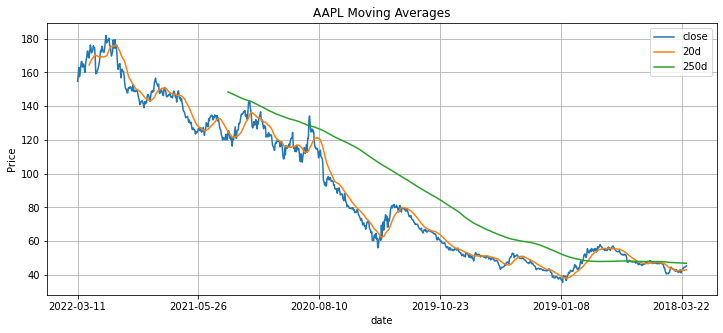

In [ ]:
priceAnalysis('AAPL')

           symbol period  growthCashAndCashEquivalents  \
date                                                     
2022-09-24   AAPL     FY                     -0.323240   
2021-09-25   AAPL     FY                     -0.080913   
2020-09-26   AAPL     FY                     -0.221685   
2019-09-28   AAPL     FY                      0.884923   
2018-09-29   AAPL     FY                      0.277195   

            growthShortTermInvestments  growthCashAndShortTermInvestments  \
date                                                                        
2022-09-24                   -0.109787                          -0.228851   
2021-09-25                   -0.476657                          -0.311228   
2020-09-26                    0.023476                          -0.095607   
2019-09-28                    0.280405                           0.516674   
2018-09-29                   -0.250575                          -0.106227   

            growthNetReceivables  growthInventory  gr

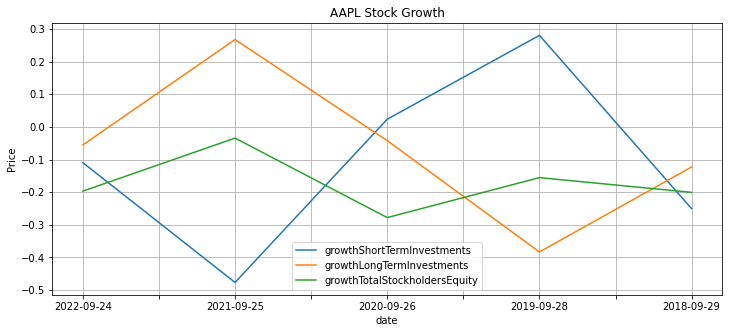

In [ ]:
growthAnalysis('AAPL')

                  date         cik  filingDate  \
firstAdded                                       
2013-12-31  2021-09-30  0000102909  2021-11-12   
2013-12-31  2021-09-30  0001364742  2021-09-30   
2016-03-31  2021-09-30  0001067983  2021-11-15   
2015-12-31  2021-09-30  0000093751  2021-11-15   
2013-12-31  2021-09-30  0000315066  2022-02-14   
2013-12-31  2021-09-30  0001214717  2021-11-12   
2013-12-31  2021-09-30  0000073124  2021-11-11   
2013-12-31  2021-09-30  0000080255  2021-11-15   
2012-12-31  2021-09-30  0001390777  2021-11-18   
2013-03-31  2021-09-30  0001374170  2022-11-14   
2013-12-31  2021-09-30  0000070858  2021-11-15   
2013-12-31  2021-09-30  0000895421  2021-11-15   
2013-12-31  2021-09-30  0000019617  2021-11-12   
2013-12-31  2021-09-30  0000764068  2021-11-15   
2013-12-31  2021-09-30  0001521019  2021-11-12   
2013-12-31  2021-09-30  0000072971  2021-11-15   
2013-12-31  2021-09-30  0000884546  2021-11-15   
2013-12-31  2021-09-30  0000886982  2022-01-20   


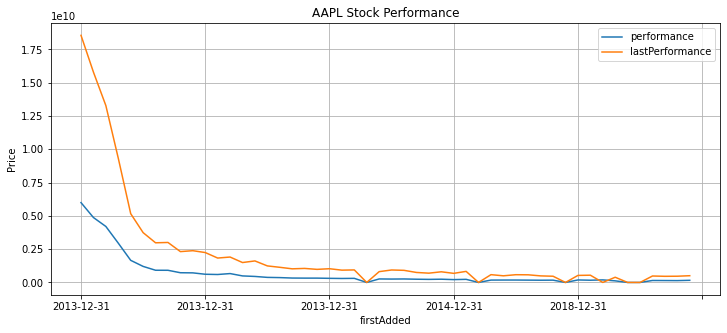

In [ ]:
performanceAnalysis('AAPL')

What is interesting is you can see the price drop in 2013 after the Q1 earnings were released. And where other subsequent drops were recorded. 

https://www.youtube.com/watch?v=JyU5qqPpg0E
https://towardsdatascience.com/python-stock-analysis-balance-sheet-trend-analysis-18e6eb63cdc

# **Stock Prediction Using TensorFlow**



> Here is small exercise using TensorFlow to predict stock prices. I will say TensorFlow is not very sutable for stock prediction and this very basic model is not very effective. But it is a good test case for the technology. 



# Imports

https://colab.research.google.com/github/therealcyberlord/tensorflow_keras_stock_prediction/blob/master/Stock.ipynb#scrollTo=MykNcyYGwG4r

In [ ]:
from google.colab import drive
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from collections import deque
import tensorflow as tf
from tensorflow import keras 
import numpy as np
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization 
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Retrive the Data

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
stockFile = open('/content/gdrive/MyDrive/AAPL.csv', 'rb')
stockData = pd.read_csv(stockFile)

Download and read the data

In [ ]:
stockData.dropna(inplace=True)
stockData.drop('Adj Close', axis=1, inplace=True)
stockData.head()

,Date,Open,High,Low,Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,73449600


In [ ]:
stockData.set_index('Date', inplace=True)
stockData.head()

,Open,High,Low,Close,Volume
Date,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,73449600


# Visualize the Data

Visualize the data. There are 10,000 rows which condeses the data. 

Apple tends to be pretty consitent on their open and close prices.

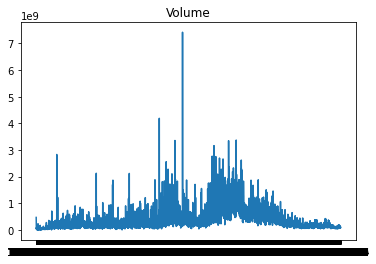

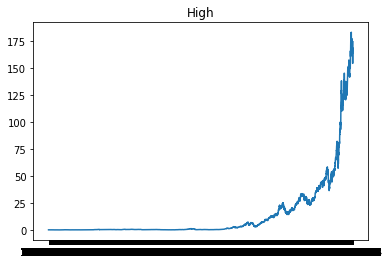

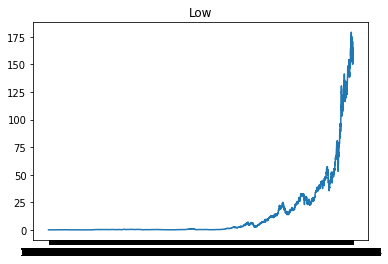

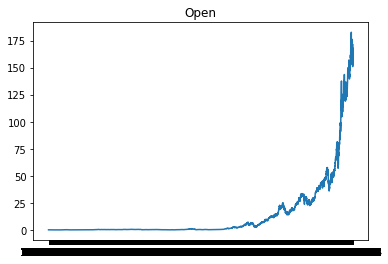

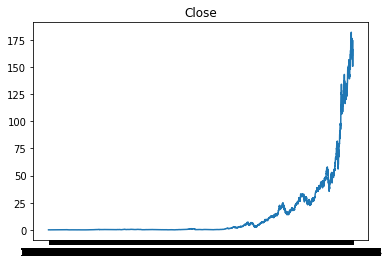

In [ ]:
plt.plot(stockData['Volume'])
plt.title('Volume')
plt.show()

plt.plot(stockData['High'])
plt.title('High')
plt.show()

plt.plot(stockData['Low'])
plt.title('Low')
plt.show()

plt.plot(stockData['Open'])
plt.title('Open')
plt.show()

plt.plot(stockData['Close'])
plt.title('Close')
plt.show()

# Sort and Break Into Test and Train

Sort the data in sequential order without shuffling.

In [ ]:
times = sorted(stockData.index.values)

Split data into test and train.

In [ ]:
df_TRAIN, df_TEST = train_test_split(stockData, train_size=0.8, test_size=0.2, shuffle=False)

Scale the data if there are any points that are not scaled between 0 and 1.

In [ ]:
v = df_TRAIN.loc[:].values
MINMAX_scaler = MinMaxScaler()
df_TRAIN = MINMAX_scaler.fit_transform(v)
df_TEST = MINMAX_scaler.transform(df_TEST.loc[:].values)

Add timestamp

In [ ]:
def TimeSeries(arr):
  limit = 10
  SequentialData = []
  previousDays = deque(maxlen=limit)
  for i in arr:
    previousDays.append([n for n in i[:-1]]) 
    if len(previousDays) == limit:
      SequentialData.append([np.array(previousDays), i[-1]])
  return SequentialData

In [ ]:
df_TRAIN = TimeSeries(df_TRAIN)
df_TEST = TimeSeries(df_TEST)

X_TRAIN = []
y_TRAIN = []
X_TEST = []
y_TEST = []

for feature, label in df_TRAIN:
  X_TRAIN.append(feature)
  y_TRAIN.append(label)
  
for feature, label in df_TEST:
  X_TEST.append(feature)
  y_TEST.append(label)

X_TRAIN = np.array(X_TRAIN)
X_TEST = np.array(X_TEST)
y_TRAIN = np.array(y_TRAIN)
y_TEST = np.array(y_TEST)

# Create the Model

Create the model with LSTM. 

In [ ]:
model = Sequential()
model.add(LSTM(128, input_shape=(X_TRAIN.shape[1:])))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

adam = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)
earlyStop = EarlyStopping(monitor='loss', patience=10)
model.compile(loss='mean_squared_error',
              optimizer=adam,
              metrics=['mse', 'mae'])

model.fit(X_TRAIN, y_TRAIN, epochs=10, batch_size=12, callbacks=[earlyStop])

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


694/694 [==============================] - 11s 12ms/step - loss: 0.0079 - mse: 0.0079 - mae: 0.0559
Epoch 2/10
694/694 [==============================] - 8s 12ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0430
Epoch 3/10
694/694 [==============================] - 8s 12ms/step - loss: 0.0029 - mse: 0.0029 - mae: 0.0352
Epoch 4/10
694/694 [==============================] - 9s 12ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0322
Epoch 5/10
694/694 [==============================] - 8s 12ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0305
Epoch 6/10
694/694 [==============================] - 10s 15ms/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0295
Epoch 7/10
694/694 [==============================] - 9s 12ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0285
Epoch 8/10
694/694 [==============================] - 8s 12ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0277
Epoch 9/10
694/694 [==============================] - 9s 12ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0273
Epoch 10/10
694/694

# Visualize the Results

Plot points.

65/65 [==============================] - 1s 7ms/step


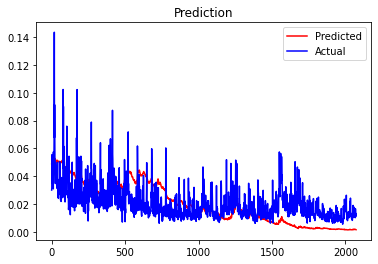

In [ ]:
model.evaluate(X_TEST, y_TEST)
pred = model.predict(X_TEST)

plt.plot(pred, 'r')
plt.plot(y_TEST, 'b')
plt.title('Prediction')
plt.legend(['Predicted', 'Actual'])
plt.show()

# References

https://site.financialmodelingprep.com/developer/docs/#Stock-Historical-Price

https://technical-analysis-library-in-python.readthedocs.io/en/latest/

https://www.udemy.com/course/technical-analysis-with-python-for-algorithmic-trading/

https://www.youtube.com/watch?v=0E_31WqVzCY

https://www.askpython.com/python/examples/stock-price-prediction-python

In [ ]:
!pip install nbconvert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%%shell
jupyter nbconvert --to html /content/Project_4200_AidenClarkipynb.ipynb

[NbConvertApp] Converting notebook /content/Project_4200_AidenClarkipynb.ipynb to html
[NbConvertApp] Writing 587392 bytes to /content/Project_4200_AidenClarkipynb.html
